In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
%config Completer.use_jedi=False

Classification tasks with TensorFlow

Identifying and dealing with overfitting through early stopping callbacks and dropout layers.

Early stopping callbacks is a technique for keras to automatically stop training based on a loss
condition on the validation data passed during model.fit() call

Dropout layers

Dropout can be added to layers to turn off neurons during training to prevent overfitting.

In [4]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

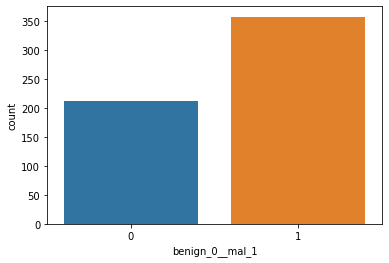

In [9]:
sns.countplot(x='benign_0__mal_1', data=df)

In [17]:
sns.set_style('whitegrid')

<AxesSubplot:>

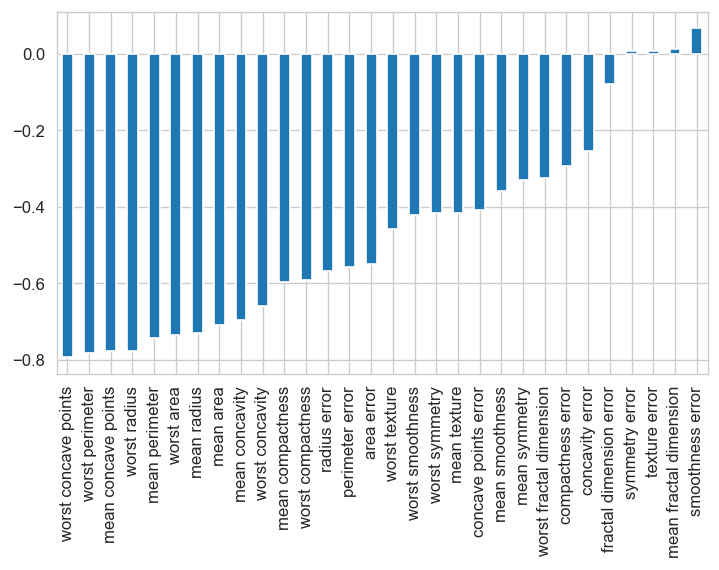

In [20]:
plt.figure(figsize=(7, 4), dpi=120)

# plot correlation of other features to the target column.
# grab everything except target column for the plot.
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

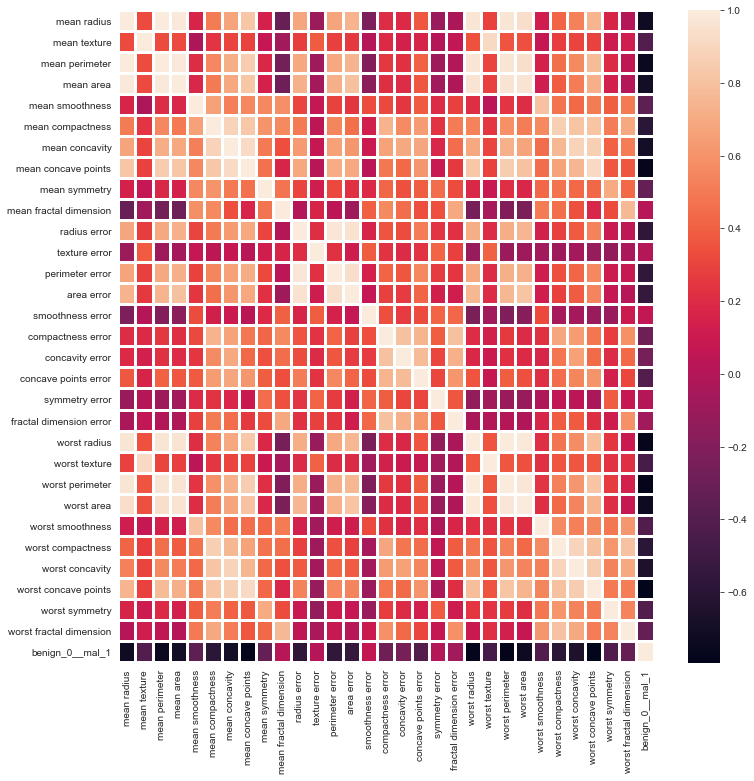

In [24]:
# heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=False, lw=2)

In [27]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

Dealing with overfitting and evaluation

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense, Dropout

In [37]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# use sigmoid activation fn as it is a binary classification problem.
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Choice of large epoch is to show the effect of overfitting on the training data

In [38]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6583 - val_loss: 0.6452
Epoch 2/600
426/426 [==============================] - 0s 185us/sample - loss: 0.6311 - val_loss: 0.6172
Epoch 3/600
426/426 [==============================] - 0s 270us/sample - loss: 0.6013 - val_loss: 0.5854
Epoch 4/600
426/426 [==============================] - 0s 225us/sample - loss: 0.5675 - val_loss: 0.5475
Epoch 5/600
426/426 [==============================] - 0s 232us/sample - loss: 0.5307 - val_loss: 0.5063
Epoch 6/600
426/426 [==============================] - 0s 237us/sample - loss: 0.4881 - val_loss: 0.4613
Epoch 7/600
426/426 [==============================] - 0s 258us/sample - loss: 0.4447 - val_loss: 0.4143
Epoch 8/600
426/426 [=========================

426/426 [==============================] - 0s 129us/sample - loss: 0.0552 - val_loss: 0.1001
Epoch 72/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0539 - val_loss: 0.1084
Epoch 73/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0557 - val_loss: 0.1007
Epoch 74/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0553 - val_loss: 0.1022
Epoch 75/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0590 - val_loss: 0.1049
Epoch 76/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0518 - val_loss: 0.1135
Epoch 77/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0574 - val_loss: 0.1020
Epoch 78/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0519 - val_loss: 0.1051
Epoch 79/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0508 - val_loss: 0.1039
Epoch 80/600
426/426 [==============================] - 0s 

Epoch 148/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0410 - val_loss: 0.1130
Epoch 149/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0402 - val_loss: 0.1135
Epoch 150/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0389 - val_loss: 0.1137
Epoch 151/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0388 - val_loss: 0.1136
Epoch 152/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0379 - val_loss: 0.1124
Epoch 153/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0392 - val_loss: 0.1136
Epoch 154/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0414 - val_loss: 0.1199
Epoch 155/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0379 - val_loss: 0.1110
Epoch 156/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0377 - val_loss: 0.1161
Epoch 157/600
426/426 [==============

426/426 [==============================] - 0s 131us/sample - loss: 0.0407 - val_loss: 0.1444
Epoch 225/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0403 - val_loss: 0.1220
Epoch 226/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0393 - val_loss: 0.1315
Epoch 227/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0342 - val_loss: 0.1216
Epoch 228/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0326 - val_loss: 0.1248
Epoch 229/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0313 - val_loss: 0.1270
Epoch 230/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0323 - val_loss: 0.1270
Epoch 231/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0348 - val_loss: 0.1317
Epoch 232/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0316 - val_loss: 0.1233
Epoch 233/600
426/426 [============================

426/426 [==============================] - 0s 115us/sample - loss: 0.0253 - val_loss: 0.1426
Epoch 301/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0256 - val_loss: 0.1356
Epoch 302/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0271 - val_loss: 0.1527
Epoch 303/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0253 - val_loss: 0.1346
Epoch 304/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0310 - val_loss: 0.1471
Epoch 305/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0311 - val_loss: 0.1357
Epoch 306/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0261 - val_loss: 0.1423
Epoch 307/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0236 - val_loss: 0.1381
Epoch 308/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0226 - val_loss: 0.1442
Epoch 309/600
426/426 [============================

426/426 [==============================] - 0s 124us/sample - loss: 0.0201 - val_loss: 0.1714
Epoch 377/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0176 - val_loss: 0.1683
Epoch 378/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0169 - val_loss: 0.1694
Epoch 379/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0192 - val_loss: 0.1557
Epoch 380/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0187 - val_loss: 0.1665
Epoch 381/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0172 - val_loss: 0.1694
Epoch 382/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0170 - val_loss: 0.1697
Epoch 383/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0176 - val_loss: 0.1593
Epoch 384/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0183 - val_loss: 0.1706
Epoch 385/600
426/426 [============================

426/426 [==============================] - 0s 131us/sample - loss: 0.0139 - val_loss: 0.2235
Epoch 453/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0152 - val_loss: 0.1817
Epoch 454/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0154 - val_loss: 0.2094
Epoch 455/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0124 - val_loss: 0.1852
Epoch 456/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0123 - val_loss: 0.1999
Epoch 457/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0126 - val_loss: 0.1978
Epoch 458/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0120 - val_loss: 0.1901
Epoch 459/600
426/426 [==============================] - 0s 256us/sample - loss: 0.0121 - val_loss: 0.1927
Epoch 460/600
426/426 [==============================] - ETA: 0s - loss: 0.0143    - 0s 232us/sample - loss: 0.0119 - val_loss: 0.1936
Epoch 461/600
426/426 [

426/426 [==============================] - 0s 143us/sample - loss: 0.0099 - val_loss: 0.2477
Epoch 529/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0103 - val_loss: 0.2080
Epoch 530/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0111 - val_loss: 0.2634
Epoch 531/600
426/426 [==============================] - 0s 240us/sample - loss: 0.0100 - val_loss: 0.2188
Epoch 532/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0085 - val_loss: 0.2281
Epoch 533/600
426/426 [==============================] - 0s 200us/sample - loss: 0.0094 - val_loss: 0.2097
Epoch 534/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0095 - val_loss: 0.2438
Epoch 535/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0083 - val_loss: 0.2173
Epoch 536/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0093 - val_loss: 0.2842
Epoch 537/600
426/426 [============================

In [39]:
losses_df = pd.DataFrame(model.history.history)

In [40]:
losses_df.head()

,loss,val_loss
0,0.658290,0.645183
1,0.631071,0.617245
2,0.601267,0.585366
3,0.567498,0.547461
4,0.530695,0.506324


The plot below is a case of overfitting

<AxesSubplot:>

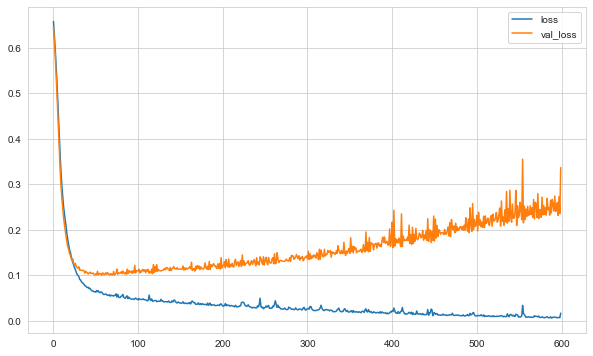

In [44]:
losses_df.plot(figsize=(10, 6))

As observed, as the training loss continues to decrease, the validation loss starts to rise, 
which is a case of overfitting.

Below is an illustration of how to work with the keras technique to prevent overfitting
through Early Stopping Callbacks

Use the same model

In [46]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

# use sigmoid activation fn as it is a binary classification problem.
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
# help(EarlyStopping)

Early stopping will stop the training when a monitored quality has stopped improving

In [50]:
early_stop = EarlyStopping(monitor='val_loss', mode='min')

In [51]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), 
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6896 - val_loss: 0.6752
Epoch 2/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6683 - val_loss: 0.6514
Epoch 3/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6372 - val_loss: 0.6144
Epoch 4/600
426/426 [==============================] - 0s 167us/sample - loss: 0.6024 - val_loss: 0.5779
Epoch 5/600
426/426 [==============================] - 0s 185us/sample - loss: 0.5631 - val_loss: 0.5350
Epoch 6/600
426/426 [==============================] - 0s 160us/sample - loss: 0.5170 - val_loss: 0.4841
Epoch 7/600
426/426 [==============================] - 0s 268us/sample - loss: 0.4641 - val_loss: 0.4317
Epoch 8/600
426/426 [==============================] - 0s 160us/sample - loss: 0.4142 - val_loss: 0.3823
Epoch 9/600
426/426 [==============================] - 0s 345us/sample - loss: 0.3649 - val_loss: 0.3359
Epoch 10/60

With calbacks, you don't have to worry about the number of epochs you are training on.

In [52]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

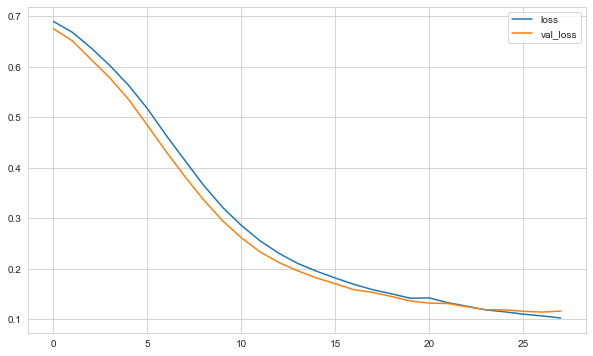

In [54]:
model_loss.plot(figsize=(10, 6))

Another way to prevent overfitting is using the dropout, which will turn off a certain
percentage of the neurons in the layers during training.

In [56]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5)) #half of the neurons will be randomly turned off for each epoch. 

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [57]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
         epochs=600, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7064 - val_loss: 0.6604
Epoch 2/600
426/426 [==============================] - 0s 157us/sample - loss: 0.6760 - val_loss: 0.6409
Epoch 3/600
426/426 [==============================] - 0s 171us/sample - loss: 0.6494 - val_loss: 0.6206
Epoch 4/600
426/426 [==============================] - 0s 167us/sample - loss: 0.6346 - val_loss: 0.5968
Epoch 5/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6117 - val_loss: 0.5739
Epoch 6/600
426/426 [==============================] - 0s 146us/sample - loss: 0.5830 - val_loss: 0.5419
Epoch 7/600
426/426 [==============================] - 0s 143us/sample - loss: 0.5758 - val_loss: 0.5165
Epoch 8/600
426/426 [==============================] - 0s 146us/sample - loss: 0.5351 - val_loss: 0.4901
Epoch 9/600
426/426 [==============================] - 0s 141us/sample - loss: 0.5299 - val_loss: 0.4658
Epoch 10/60

In [58]:
model_loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

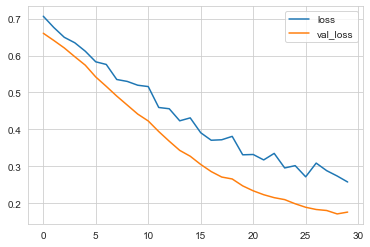

In [64]:
model_loss_df.plot()

In [65]:
predictions = model.predict_classes(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
print('confusion matrix')
print(confusion_matrix(y_test, predictions))

confusion matrix
[[53  2]
 [ 7 81]]


In [68]:
print('classification report')
print(classification_report(y_test, predictions))

classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        55
           1       0.98      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

